period mobility pattern

In [1]:
import pandas as pd
import glob
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast

df_census = pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv')
# print(list(df_census))

path = 'D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/'

In [ ]:
# Specify the path
path = 'D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/'

month='04'

# Use glob to match the pattern ‘.gz’
allfiles=[]
for name in glob.glob(path+month+'/*', recursive=True):

    file= glob.glob(name + '/*.csv.gz', recursive=True)
    allfiles.append(file[0])



df_list=[]
for i,filename in enumerate(allfiles):
    df = pd.read_csv(filename)

    df1 = df.merge(df_census, left_on='origin_census_block_group', right_on='census_block_group')
    
#process travel distance
    df1['C'] = ['greater than 0.5' if i > 0.5 else 'less than or equal to 0.5' for i in df1['percent_above_65']]
    df1 = df1.loc[df1['distance_traveled_from_home']<=df1['distance_traveled_from_home'].quantile(0.99)]
    
#process number of visits  
    result = [ast.literal_eval(x) for x in list(df1['destination_cbgs'])] #convert the strings of the columns of destination_cbgs to dictionary

    #convert destination_cbgs to pandas data frame
    df_ = pd.DataFrame(columns=['dest_bg','number of visits'])  
    df_ = pd.DataFrame([(i, j) for a in result for i, j in a.items()], columns=['dest_bg','number of visits']) 

    #repeat the original bg n times, n is deined by the mobility between oringinal and destination
    result_length = [len(item) for item in result]
    df_temp = pd.DataFrame()
    df_temp['orig_bg'] = df1['origin_census_block_group']
    df_temp['num'] = result_length
    df_temp['C'] = df1['C']
    df_temp = df_temp.reindex(df_temp.index.repeat(df_temp.num))
    df_temp.reset_index(drop=True, inplace=True)

    #put all columns together
    df_['orig_bg'] = df_temp['orig_bg']
    df_['C'] = df_temp['C']
    df_['dest_bg'] = df_['dest_bg'].astype('int64')


    df_ = df_.loc[df_['orig_bg']!=df_['dest_bg']]
    sum_visits = df_.groupby('orig_bg')['number of visits'].sum().reset_index()
    
    df1 = df1.merge(sum_visits, left_on='origin_census_block_group', right_on='orig_bg')
    
#process dwell time
    #'median_percentage_time_home'
    
    print(filename)
    
    x1=list(df1.loc[df1['C']=='greater than 0.5']['distance_traveled_from_home'])
    y1=list(df1.loc[df1['C']=='greater than 0.5']['number of visits'])
    z1=list(df1.loc[df1['C']=='greater than 0.5']['median_percentage_time_home'])
    
    df_a = pd.DataFrame({'Distance traveled from home': x1,'Number of visits': y1,'Median_percentage_time_home': z1,
                         'Percentage above age 65': 'greater than 0.5', 'Day': (i+1)*np.ones(len(x1))})
    
    x2=list(df1.loc[df1['C']=='less than or equal to 0.5']['distance_traveled_from_home'])
    y2=list(df1.loc[df1['C']=='less than or equal to 0.5']['number of visits'])
    z2=list(df1.loc[df1['C']=='less than or equal to 0.5']['median_percentage_time_home'])
    
    df_b = pd.DataFrame({'Distance traveled from home': x2,'Number of visits': y2, 'Median_percentage_time_home': z2, 
                         'Percentage above age 65': 'less than or equal to 0.5', 'Day': (i+1)*np.ones(len(x2))})
    
    df_c=pd.concat([df_b,df_a])
    
    
    
    df_list.append(df_c)

    
    
    
df_all_mob=pd.concat(df_list)

df_all_mob=df_all_mob.rename(columns={'Median_percentage_time_home':'% of Time Spent at Home'  })

In [ ]:
df_all_mob.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/MobilityResults/countryLevelData-Figure/US_distribution_mobility_pattern.csv')



In [13]:
##month='04'

def get_data_by_month(month):
    print(month+'_start')
    
    # Use glob to match the pattern ‘.gz’
    allfiles=[]
    for name in glob.glob(path+month+'/*', recursive=True):

        file= glob.glob(name + '/*.csv.gz', recursive=True)
        print(file)
        if len(file)!=0:
            
            day=0
            if int(file[0].split('-')[2][0]) ==0:
                day=int(file[0].split('-')[2][1]) 
            else:
                day= int(file[0].split('-')[2]) 
                
            allfiles.append((file[0],day))



    df_list=[]
    for i,filenames in enumerate(allfiles):
        filename=filenames[0]
        day=filenames[1]
        
        df = pd.read_csv(filename)

        df1 = df.merge(df_census, left_on='origin_census_block_group', right_on='census_block_group')

    #process travel distance
        df1['C'] = ['greater than 0.5' if i > 0.5 else 'less than or equal to 0.5' for i in df1['percent_above_65']]
        df1 = df1.loc[df1['distance_traveled_from_home']<=df1['distance_traveled_from_home'].quantile(0.99)]

    #process number of visits  
        result = [ast.literal_eval(x) for x in list(df1['destination_cbgs'])] #convert the strings of the columns of destination_cbgs to dictionary

        #convert destination_cbgs to pandas data frame
        df_ = pd.DataFrame(columns=['dest_bg','number of visits'])  
        df_ = pd.DataFrame([(i, j) for a in result for i, j in a.items()], columns=['dest_bg','number of visits']) 

        #repeat the original bg n times, n is deined by the mobility between oringinal and destination
        result_length = [len(item) for item in result]
        df_temp = pd.DataFrame()
        df_temp['orig_bg'] = df1['origin_census_block_group']
        df_temp['num'] = result_length
        df_temp['C'] = df1['C']
        df_temp = df_temp.reindex(df_temp.index.repeat(df_temp.num))
        df_temp.reset_index(drop=True, inplace=True)

        #put all columns together
        df_['orig_bg'] = df_temp['orig_bg']
        df_['C'] = df_temp['C']
        df_['dest_bg'] = df_['dest_bg'].astype('int64')


        df_ = df_.loc[df_['orig_bg']!=df_['dest_bg']]
        sum_visits = df_.groupby('orig_bg')['number of visits'].sum().reset_index()

        df1 = df1.merge(sum_visits, left_on='origin_census_block_group', right_on='orig_bg')

    #process dwell time
        #'median_percentage_time_home'

        print(filename)

        x1=list(df1.loc[df1['C']=='greater than 0.5']['distance_traveled_from_home'])
        y1=list(df1.loc[df1['C']=='greater than 0.5']['number of visits'])
        z1=list(df1.loc[df1['C']=='greater than 0.5']['median_percentage_time_home'])

        df_a = pd.DataFrame({'Distance traveled from home': x1,'Number of visits': y1,'Median_percentage_time_home': z1,
                             'Percentage above age 65': 'greater than 0.5', 'Day': day*np.ones(len(x1))})

        x2=list(df1.loc[df1['C']=='less than or equal to 0.5']['distance_traveled_from_home'])
        y2=list(df1.loc[df1['C']=='less than or equal to 0.5']['number of visits'])
        z2=list(df1.loc[df1['C']=='less than or equal to 0.5']['median_percentage_time_home'])

        df_b = pd.DataFrame({'Distance traveled from home': x2,'Number of visits': y2, 'Median_percentage_time_home': z2, 
                             'Percentage above age 65': 'less than or equal to 0.5', 'Day': day*np.ones(len(x2))})

        df_c=pd.concat([df_b,df_a])



        df_list.append(df_c)




    dff=pd.concat(df_list)

    dff=dff.rename(columns={'Median_percentage_time_home':'Percentage of time spent at home'  }) 
    dff.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/MobilityResults/countryLevelData-Figure/US_distribution_mobility_pattern_'+month+'.csv')
    print(month+'_done')
    return dff
    
    
def plot_mobility_by_month(month):
    dff=get_data_by_month(month)
    #dff=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/MobilityResults/countryLevelData-Figure/US_distribution_mobility_pattern_'+month+'.csv')
    #dff=dff.rename(columns={"% of Time Spent at Home":"Percentage of time spent at home"})
    
    # Create a figure 
    fig,ax=plt.subplots(3,1,constrained_layout=True,figsize=(372/72.27, 1.2*372/72.27))

    colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

    sn=sns.lineplot(x="Day", y="Distance traveled from home", hue="Percentage above age 65", data=dff,ax=ax[0],palette=colors)
    sn.legend(title='',prop={'size': 5})
    for j in [7,14,21,28]:
        sn.axvline(x=j,color='red',linestyle='--')
    sn.xaxis.set_major_locator(plt.NullLocator())
    sn.set_xlabel('')
    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5) 
    sn.set_ylabel("Distance traveled from home", fontsize=6) 

    sn=sns.lineplot(x="Day", y="Number of visits", hue="Percentage above age 65", data=dff,ax=ax[1],palette=colors)
    sn.legend(title='',prop={'size': 5})
    for j in [7,14,21,28]:
        sn.axvline(x=j,color='red',linestyle='--')    
    #plt.xlim(-0.5,1.5)
    #plt.ylim(1200,2900)
    sn.xaxis.set_major_locator(plt.NullLocator())
    sn.set_xlabel('')
    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5) 
    sn.set_ylabel("Number of visits", fontsize=6) 

    sn=sns.lineplot(x="Day", y="Percentage of time spent at home", hue="Percentage above age 65", data=dff,ax=ax[2],palette=colors)
    sn.legend(title='',prop={'size': 5})
    for j in [7,14,21,28]:
        sn.axvline(x=j,color='red',linestyle='--')
    sn.set_xticks(range(1,31))

    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5)  
    sn.set_ylabel("Percentage of time spent at home", fontsize=6) 
    sn.set_xlabel('Day', fontsize=6)  # 设置x轴标题大小

    #save figure

    fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format(month+'_weekly_mobility_pattern-372pt'),dpi=600
               ,bbox_inches='tight')
    #plt.show()

01_start
[]
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\02\\2019-01-02-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\03\\2019-01-03-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\04\\2019-01-04-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\05\\2019-01-05-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\06\\2019-01-06-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\07\\2019-01-07-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\08\\2019-01-08-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/01\\09\\2019-01-09-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

07_start
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\01\\2019-07-01-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\02\\2019-07-02-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\03\\2019-07-03-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\04\\2019-07-04-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\05\\2019-07-05-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\06\\2019-07-06-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\07\\2019-07-07-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/07\\08\\2019-07-08-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/ne

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

11_start
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\01\\2019-11-01-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\02\\2019-11-02-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\03\\2019-11-03-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\04\\2019-11-04-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\05\\2019-11-05-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\06\\2019-11-06-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\07\\2019-11-07-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/new data/Mobility/11\\08\\2019-11-08-social-distancing.csv.gz']
['D:/main/1_research/P10_Mobility/p10_aging mobility/ne

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

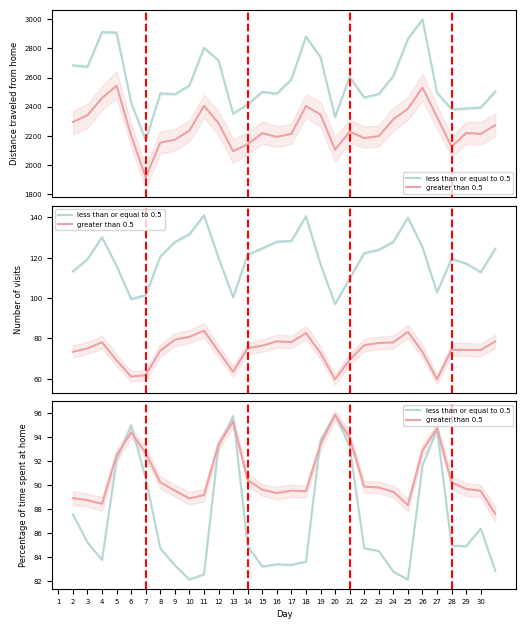

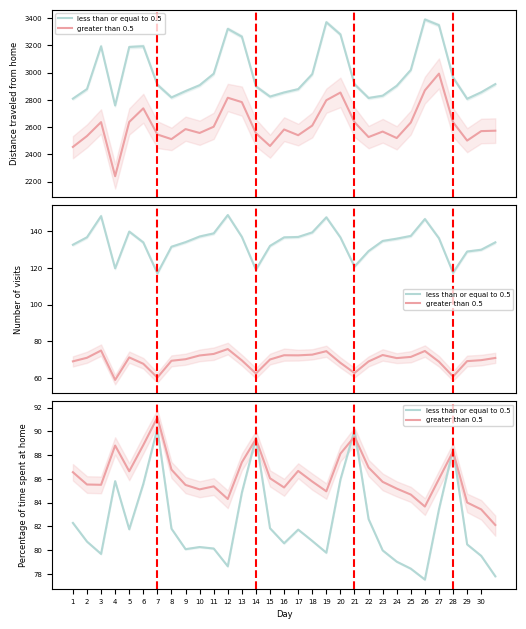

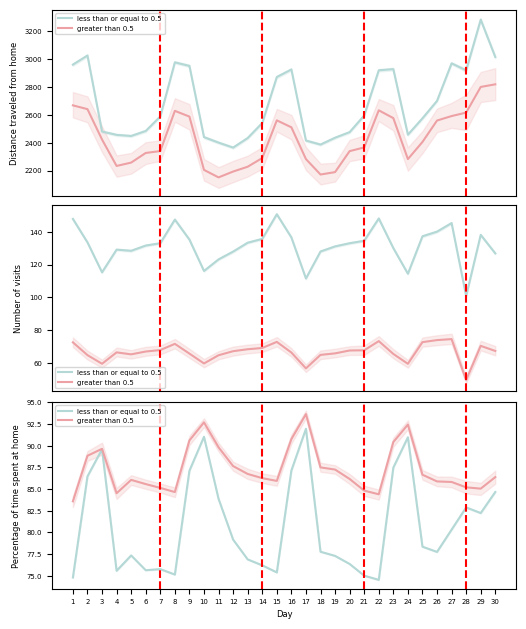

In [14]:
for month in ['01','07','11']:
    plot_mobility_by_month(month)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

01


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

07


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

11


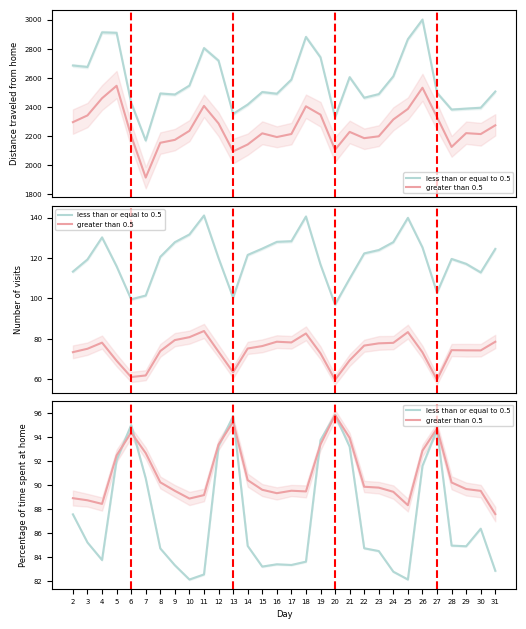

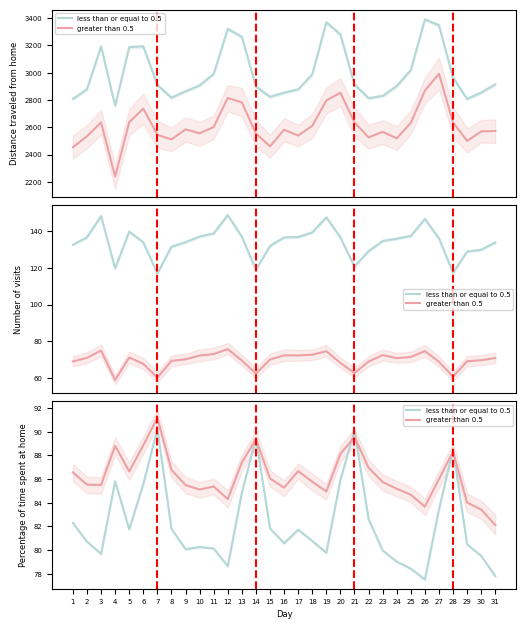

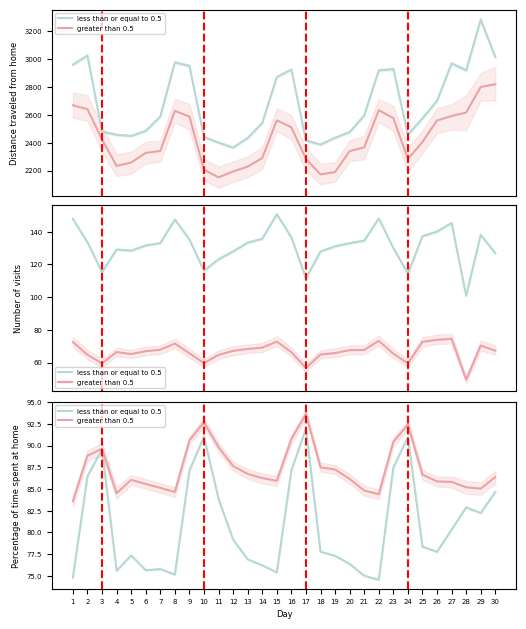

In [15]:
range_dict={'01':range(2,32),'07':range(1,32),'11':range(1,31)}
sundays_dict={'01':[6,13,20,27],'07':[7,14,21,28],'11':[3,10,17,24]}

for month in ['01','07','11']:
    #dff=get_data_by_month(month)
    dff=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/MobilityResults/countryLevelData-Figure/US_distribution_mobility_pattern_'+month+'.csv')
    #dff=dff.rename(columns={"% of Time Spent at Home":"Percentage of time spent at home"})
    
    # Create a figure 
    fig,ax=plt.subplots(3,1,constrained_layout=True,figsize=(372/72.27, 1.2*372/72.27))

    colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

    sn=sns.lineplot(x="Day", y="Distance traveled from home", hue="Percentage above age 65", data=dff,ax=ax[0],palette=colors)
    sn.legend(title='',prop={'size': 5})
    for j in sundays_dict[month]:#[7,14,21,28]:
        sn.axvline(x=j,color='red',linestyle='--')
    sn.xaxis.set_major_locator(plt.NullLocator())
    sn.set_xlabel('')
    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5)  
    sn.set_ylabel("Distance traveled from home", fontsize=6) 

    sn=sns.lineplot(x="Day", y="Number of visits", hue="Percentage above age 65", data=dff,ax=ax[1],palette=colors)
    sn.legend(title='',prop={'size': 5})
    for j in sundays_dict[month]:#[7,14,21,28]:
        sn.axvline(x=j,color='red',linestyle='--')    
    #plt.xlim(-0.5,1.5)
    #plt.ylim(1200,2900)
    sn.xaxis.set_major_locator(plt.NullLocator())
    sn.set_xlabel('')
    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5)  
    sn.set_ylabel("Number of visits", fontsize=6) 

    sn=sns.lineplot(x="Day", y="Percentage of time spent at home", hue="Percentage above age 65", data=dff,ax=ax[2],palette=colors)
    sn.legend(title='',prop={'size': 5})
    for j in sundays_dict[month]:#[7,14,21,28]:
        sn.axvline(x=j,color='red',linestyle='--')
    sn.set_xticks(range_dict[month])#range(1,31)

    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5)  
    sn.set_ylabel("Percentage of time spent at home", fontsize=6) 
    sn.set_xlabel('Day', fontsize=6)  # 设置x轴标题大小

    #save figure

    fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format(month+'_weekly_mobility_pattern-372pt'),dpi=600
               ,bbox_inches='tight')
    print(month)

In [2]:
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import  unary_union
import math
import pandas as pd

mobility pattern difference  

In [159]:
dff=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/MobilityResults/countryLevelData-Figure/US_distribution_mobility_pattern.csv')
dff=dff.rename(columns={"% of Time Spent at Home":"Percentage of time spent at home"})

In [160]:
dff

,Unnamed: 0,Distance traveled from home,Number of visits,Percentage of time spent at home,Percentage above age 65,Day
0,0,3513,107,67,less than or equal to 0.5,1.0
1,1,3150,222,90,less than or equal to 0.5,1.0
2,2,1727,96,84,less than or equal to 0.5,1.0
3,3,4456,620,74,less than or equal to 0.5,1.0
4,4,305,14,0,less than or equal to 0.5,1.0
...,...,...,...,...,...,...
6512277,2230,6244,41,2,greater than 0.5,30.0
6512278,2231,5539,135,84,greater than 0.5,30.0
6512279,2232,1652,276,67,greater than 0.5,30.0
6512280,2233,2453,13,100,greater than 0.5,30.0


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

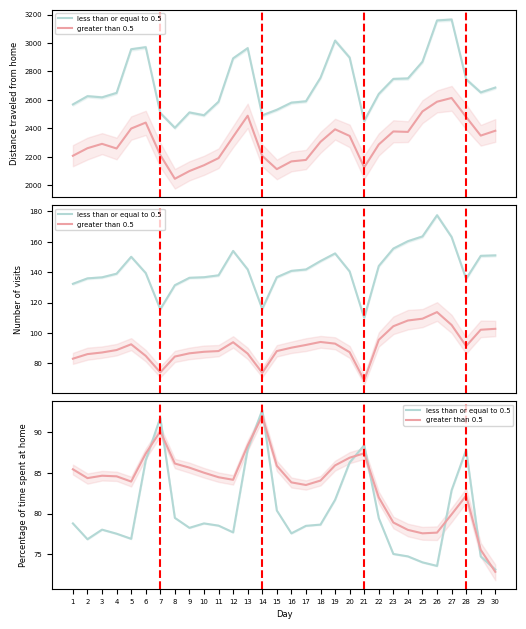

In [166]:

# Create a figure 
fig,ax=plt.subplots(3,1,constrained_layout=True,figsize=(372/72.27, 1.2*372/72.27))

colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

sn=sns.lineplot(x="Day", y="Distance traveled from home", hue="Percentage above age 65", data=dff,ax=ax[0],palette=colors)
sn.legend(title='',prop={'size': 5})
for j in [7,14,21,28]:
    sn.axvline(x=j,color='red',linestyle='--')
sn.xaxis.set_major_locator(plt.NullLocator())
sn.set_xlabel('')
sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5)  
sn.set_ylabel("Distance traveled from home", fontsize=6) 

sn=sns.lineplot(x="Day", y="Number of visits", hue="Percentage above age 65", data=dff,ax=ax[1],palette=colors)
sn.legend(title='',prop={'size': 5})
for j in [7,14,21,28]:
    sn.axvline(x=j,color='red',linestyle='--')    
#plt.xlim(-0.5,1.5)
#plt.ylim(1200,2900)
sn.xaxis.set_major_locator(plt.NullLocator())
sn.set_xlabel('')
sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5) 
sn.set_ylabel("Number of visits", fontsize=6) 

sn=sns.lineplot(x="Day", y="Percentage of time spent at home", hue="Percentage above age 65", data=dff,ax=ax[2],palette=colors)
sn.legend(title='',prop={'size': 5})
for j in [7,14,21,28]:
    sn.axvline(x=j,color='red',linestyle='--')
sn.set_xticks(range(1,31))

sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5)  
sn.set_ylabel("Percentage of time spent at home", fontsize=6) 
sn.set_xlabel('Day', fontsize=6) 
    
#save figure

fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format('weekly_mobility_pattern-372pt'),dpi=600
           ,bbox_inches='tight')
plt.show()

In [167]:

fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format('weekly_mobility_pattern-372pt'),dpi=600
           ,bbox_inches='tight') #b

plot demand ratio distribution

In [3]:
#read data
listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']

prepath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/'

allList=[]
for key in listParentType: 
    homePath=prepath+'homo_supply_demand/'+key+'.csv'
    df1=pd.read_csv(homePath,usecols=['census_block_group','ParentType','demand_visits','demand_ratios','demand_met_in_local','age'])
    df1=df1.rename(columns={'demand_met_in_local':'AccRatio_5 miles'})
    df1=df1.loc[df1['AccRatio_5 miles']<=1]
    
    hetePath=prepath+'hete_supply_demand/'+key+'.csv'
    df2=pd.read_csv(hetePath,usecols=['census_block_group','demand_met_in_local'])
    df2=df2.rename(columns={'demand_met_in_local':'AccRatio_10 miles'})
    df2=df2.loc[df2['AccRatio_10 miles']<=1]
    
    censusPath='D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv'
    df3=pd.read_csv(censusPath,usecols=['census_block_group','percent_above_65',
                                        'median_income_normalized by 250000','percent_undergraduate or higher','percent_minority'])
    
    df2=pd.merge(df2,df3)
    
    allList.append(pd.merge(df1,df2))
    print(key)
    
dfAll=pd.concat(allList)   

Health Care Services
Pharmaceutical and Medical Supply Stores
Grocery and Food Supply
Social Assistance
Transportation Services
Home Health Care Services
Financial Services
Legal Services
Housing and Real Estate
Personal Care Services
Utility Services
Retail Stores for Basic Needs


In [102]:
dfAll

,census_block_group,ParentType,demand_visits,demand_ratios,AccRatio_5 miles,age,AccRatio_10 miles,percent_above_65,median_income_normalized by 250000,percent_undergraduate or higher,percent_minority
0,10010201001,Health Care Services,47.0,0.063087,0.574468,less than or equal to 0.5,0.659574,0.036242,2.000000,0.009396,0.214765
1,10010201002,Health Care Services,75.0,0.059289,0.280000,less than or equal to 0.5,0.280000,0.114625,0.311252,0.032411,0.143874
2,10010202001,Health Care Services,58.0,0.060417,0.655172,less than or equal to 0.5,0.655172,0.161458,0.100716,0.030208,0.623958
3,10010202002,Health Care Services,24.0,0.019417,0.666667,less than or equal to 0.5,0.666667,0.094660,0.180416,0.049353,0.502427
4,10010203001,Health Care Services,178.0,0.075296,0.292135,less than or equal to 0.5,0.320225,0.134095,0.220888,0.030457,0.373519
...,...,...,...,...,...,...,...,...,...,...,...
216346,721537505031,Retail Stores for Basic Needs,8.0,0.008138,0.000000,less than or equal to 0.5,0.000000,0.154629,0.045436,0.060020,0.222787
216347,721537505032,Retail Stores for Basic Needs,8.0,0.006270,0.000000,less than or equal to 0.5,0.000000,0.142633,0.101668,0.048589,0.200627
216348,721537506012,Retail Stores for Basic Needs,36.0,0.013319,0.111111,less than or equal to 0.5,0.111111,0.107658,0.097232,0.116167,0.174991
216349,721537506021,Retail Stores for Basic Needs,4.0,0.001995,0.000000,less than or equal to 0.5,0.000000,0.220449,0.036024,0.039900,0.171072


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


216056


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


216358


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


216672


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


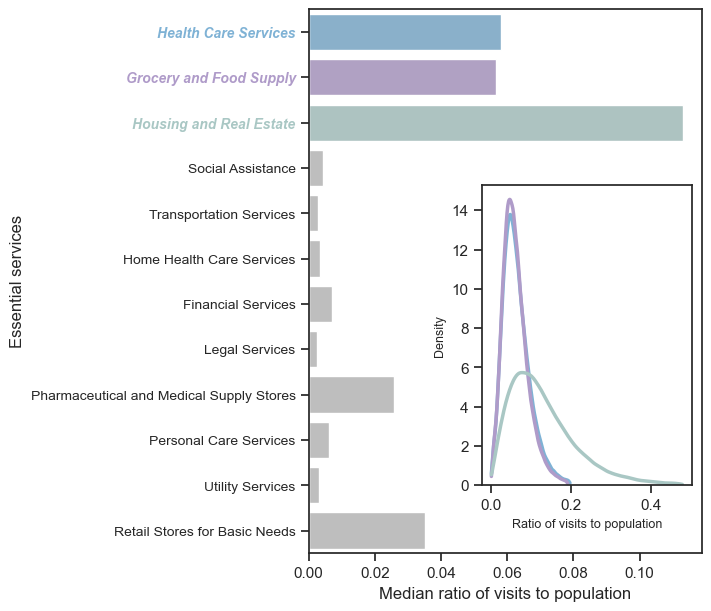

In [399]:
import numpy as np
import seaborn as sns
fig, ax=plt.subplots(constrained_layout=True, figsize=(7, 6))#
listParentType1=['Health Care Services',
                 'Grocery and Food Supply',
                'Housing and Real Estate',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']



#color
type_color_dict={'Health Care Services':'#7FB2D5','Grocery and Food Supply':'#AF9BC9', 'Housing and Real Estate':'#A9C7C4'}
colors=['#7FB2D5','#AF9BC9','#A9C7C4','#BEBEBE','#BEBEBE','#BEBEBE','#BEBEBE','#BEBEBE','#BEBEBE','#BEBEBE','#BEBEBE','#BEBEBE']

bardata=pd.DataFrame(columns=['type','median_demand_ratio'])
bardata['type']=listParentType1
bardata['median_demand_ratio']=bardata.apply(lambda x: np.median(dfAll[dfAll['ParentType']==x['type']]['demand_ratios']),
                                             axis=1)
bardata['mean_demand_ratio']=bardata.apply(lambda x: np.mean(dfAll[dfAll['ParentType']==x['type']]['demand_ratios']),axis=1)
sns.barplot(x='median_demand_ratio',y='type',data=bardata,ax=ax,palette=colors)

ax.set_ylabel('Essential services', fontsize=12)
ax.set_xlabel('Median ratio of visits to population', fontsize=12)
ax.tick_params(axis='both', which='both', bottom=True, left=True)  

ax.legend().set_visible(False)
for label in ax.get_yticklabels():
    if label.get_text() in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:      
        label.set_weight('bold')
        label.set_fontstyle('italic')
        label.set_color(type_color_dict[label.get_text()])
    label.set_fontsize(10)
#ax.tick_params(axis='y', labelsize=8)

ax1=fig.add_axes([0.68,0.2,0.3,0.5])

for key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']: 
    dfplot=dfAll[dfAll['ParentType']==key]
    dfplot= dfplot.loc[dfplot['demand_ratios']<=dfplot['demand_ratios'].quantile(0.99)]
    print(len(dfplot))
    if key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']: 
        sns.kdeplot(dfplot[dfplot['ParentType']==key]['demand_ratios'],ax=ax1,label=key,linewidth=2.5,cut=0,
                    color=type_color_dict[key])
#ax[1].set_xscale('log')
ax1.set_xlabel('Ratio of visits to population', fontsize=9)
ax1.set_ylabel('Density', fontsize=9)
ax1.tick_params(axis='both', which='both', bottom=True, left=True)  
ax1.legend().set_visible(False)


        

In [400]:
fig.savefig(prepath+'visits_ratios/subsub_demand_ratio_distribution_with_barplot.jpg',dpi=600,bbox_inches='tight')

plot background image for accratio schema

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
fl_geo=us_geo[us_geo['State']=='FL']
fl_geo['census_block_group']=fl_geo['census_block_group'].astype(str)
fl_geo['pre9code']=fl_geo.apply(lambda x: x['census_block_group'][0:9],axis=1)
ax=fl_geo[fl_geo['pre9code']=='121050106'].plot(ax=ax,kind='geo',facecolor='white',edgecolor='black')
fig.savefig(prepath+'AccRatios/AccRatio_schema.png',dpi=300)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
import matplotlib.cm as cm
import pandas as pd
import numpy as np

US distribution of HGH median accratio 

In [3]:
#read data

dfT=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv',
                     usecols=['census_block_group','population_by_age','percent_above_65'])

#homo
for key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:
    df_=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/hete_supply_demand/'+key+'.csv',
                       usecols=['census_block_group','demand_met_in_local'])
    
    df_=df_.rename(columns={'demand_met_in_local':key+'_accratio5m'})
    dfT=pd.merge(dfT,df_)
dfT['census_block_group']=dfT['census_block_group'].astype(str)
dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
            '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
            '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', 
            '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY', '60': 'AS', 
            '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}
dfT['state']=dfT.apply(lambda x: dict_state[str(int(x['census_block_group'][0:2]))] if 
                                       len(x['census_block_group'])==12 else dict_state[str(int(x['census_block_group'][0:1]))],
                                       axis=1)

In [4]:
dfT['age']=dfT.apply(lambda x: 'greater than 0.5' if x['percent_above_65']>0.5 else 'less than or equal to 0.5',
                             axis=1)
dfT['is_old']=dfT.apply(lambda x: 1 if x['percent_above_65']>0.5 else 0,
                             axis=1)

In [5]:
dfT

,census_block_group,population_by_age,percent_above_65,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,age,is_old
0,10010201001,745,0.036242,0.659574,0.893333,0.750000,AL,less than or equal to 0.5,0
1,10010201002,1265,0.114625,0.280000,0.662252,0.549488,AL,less than or equal to 0.5,0
2,10010202001,960,0.161458,0.655172,0.936508,0.742515,AL,less than or equal to 0.5,0
3,10010202002,1236,0.094660,0.666667,0.787234,0.769784,AL,less than or equal to 0.5,0
4,10010203001,2364,0.134095,0.320225,0.831461,0.479651,AL,less than or equal to 0.5,0
...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,0.226927,0.000000,1.000000,0.615385,PR,less than or equal to 0.5,0
220329,721537506012,2703,0.107658,0.181818,0.833333,0.257143,PR,less than or equal to 0.5,0
220330,721537506013,1195,0.057741,0.000000,1.000000,0.200000,PR,less than or equal to 0.5,0
220331,721537506021,2005,0.220449,2.000000,2.000000,0.277778,PR,less than or equal to 0.5,0


In [6]:
dfS=pd.DataFrame()
dfS['state']=dfT['state'].unique()
dfS['population']=dfS.apply(lambda x:sum(dfT[dfT['state']==x['state']]['population_by_age'] ),axis=1)
dfS['HCS']=dfS.apply(lambda x: np.median(dfT[(dfT['state']==x['state'])&(dfT['Health Care Services_accratio5m']<1.001)]
                                         ['Health Care Services_accratio5m']),axis=1)
dfS['GFS']=dfS.apply(lambda x: np.median(dfT[(dfT['state']==x['state'])&(dfT['Grocery and Food Supply_accratio5m']<1.001)]
                                         ['Grocery and Food Supply_accratio5m']),axis=1)
dfS['HRE']=dfS.apply(lambda x: np.median(dfT[(dfT['state']==x['state'])&(dfT['Housing and Real Estate_accratio5m']<1.001)]
                                         ['Housing and Real Estate_accratio5m']),axis=1)

In [7]:
dfS['num_old_cbg']=dfS.apply(lambda x: len (dfT[(dfT['state']==x['state'])&(dfT['is_old']==1)])
                                         ,axis=1)

In [8]:
dict_state_posi={ 'AL':(5,6),
                  'AK':(6,1),  
                  'AZ':(4,1),
                  'AR':(4,4), 
                 'CA':(3,0), 
                 'CO':(3,2), 
                 'CT':(2,9), 
                 'DE':(3,9), 
                 'DC':(4,8),
                 'FL':(6,8), 
                 'GA':(5,7), 
                 'HI':(6,0), 
                 'ID':(1,1),
                 'IL':(1,5),
                 'IN':(2,5), 
                 'IA':(2,4), 
                 'KS':(4,3), 
                 'KY':(3,5), 
                 'LA':(5,4), 
                 'ME':(0,10), 
                 'MD':(3,8), 
                 'MA':(1,9), 
                 'MI':(1,6), 
                 'MN':(1,4), 
                 'MS':(5,5), 
                 'MO':(3,4),
                 'MT':(1,2), 
                 'NE':(3,3),
                 'NV':(2,1), 
                 'NH':(0,9),
                 'NJ':(2,8), 
                 'NM':(4,2), 
                 'NY':(1,8),
                 'NC':(4,6),
                 'ND':(1,3), 
                 'OH':(2,6),
                 'OK':(5,3), 
                 'OR':(2,0),
                 'PA':(2,7), 
                 'RI':(2,10), 
                 'SC':(4,7), 
                 'SD':(2,3),
                 'TN':(4,5), 
                 'TX':(6,3),
                 'UT':(3,1), 
                 'VT':(0,8), 
                 'VA':(3,7), 
                 'WA':(1,0), 
                 'WV':(3,6),
                 'WI':(0,5), 
                 'WY':(2,2)}

In [10]:
dfS

,state,population,HCS,GFS,HRE,num_old_cbg
0,AL,4841164,0.521753,0.646341,0.476190,10
1,AK,736855,0.822876,0.755102,0.666667,0
2,AZ,6728577,0.695652,0.773585,0.759367,274
3,AR,2968472,0.500000,0.612374,0.294199,13
4,CA,38654206,0.714286,0.784722,0.727273,221
5,CO,5359295,0.722772,0.764706,0.764706,18
6,CT,3588570,0.694118,0.750000,0.724767,18
7,DE,934695,0.660000,0.659574,0.693508,19
8,DC,659009,0.684211,0.636364,0.344619,0
9,FL,19934451,0.735849,0.789474,0.786561,856


In [11]:
colors=['#EBEBEB','#D0DCE8','#B5CBE2','#98A3CA','#455D99']

accmax=max([max(dfS['HCS']),max(dfS['GFS']),max(dfS['HRE'])])
accmin=min([min(dfS['HCS']),min(dfS['GFS']),min(dfS['HRE'])])

# 创建颜色映射 cmap_for_us_spatial_dis_aaccraatio =ListedColormap(colors)
cmap_for_us_spatial_dis_aaccraatio= plt.cm.colors.LinearSegmentedColormap.from_list('my_cmap', colors,N=100)
norm = plt.Normalize(accmin, accmax)


In [12]:
popmax=max(dfS['population'])
popmin=min(dfS['population'])
print(popmin,popmax)

583029 38654206


C:\Users\Linao\AppData\Local\Temp\ipykernel_35592\2024038224.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\Linao\AppData\Local\Temp\ipykernel_35592\2024038224.py:83: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  cbar=fig.colorbar(ax2.imshow([[]],cmap=cmap_for_us_spatial_dis_aaccraatio),ax=ax2,orientation='vertical',norm=norm)


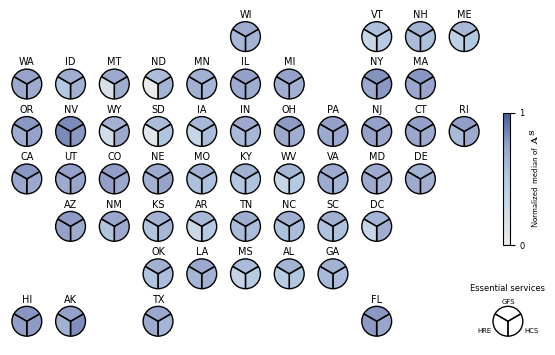

In [128]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#blues:['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58']
colors=['#EBEBEB','#D0DCE8','#B5CBE2','#98A3CA','#455D99']

accmax=max([max(dfS['HCS']),max(dfS['GFS']),max(dfS['HRE'])])
accmin=min([min(dfS['HCS']),min(dfS['GFS']),min(dfS['HRE'])])

popmax=max(dfS['population'])
popmin=min(dfS['population'])


# 创建颜色映射 cmap_for_us_spatial_dis_aaccraatio =ListedColormap(colors)
cmap_for_us_spatial_dis_aaccraatio= plt.cm.colors.LinearSegmentedColormap.from_list('my_cmap', colors,N=100)
norm = plt.Normalize(accmin, accmax)

def value_to_color(value):
    # Clamp value between 0 and 1
    #value = max(0, min(1, value))
    # Get the 'cividis' colormap
    
    
    cmap =cmap_for_us_spatial_dis_aaccraatio  #cm.get_cmap('summer')
    # Map value to colormap
    color = cmap(norm(value))
    return color

def radius(col):
    p=col['population']
    
   
    
    p0=popmin
    p1=popmax
    
    r0=0.4+0.15
    r1=0.9+0.15
    
     
    rr=r0+(p-p0)*(r1-r0)/(p1-p0)
    
    p=np.log(col['population'])
    p0=np.log(popmin)
    p1=np.log(popmax)    
    rlog=r0+(p-p0)*(r1-r0)/(p1-p0)
    
    
    rconst=1.1 #0.9
    
    return rconst
rconst=1.1    
dfS['radius']=dfS.apply(radius,axis=1)


fig, ax=plt.subplots(7,12,constrained_layout=True, figsize=(372/72.27, 240/72.27))#
fig.tight_layout()
for state in dict_state_posi.keys():
    row=dict_state_posi[state][0]
    col=dict_state_posi[state][1]
    HCS=dfS[dfS['state']==state]['HCS'].iat[0]
    GFS=dfS[dfS['state']==state]['GFS'].iat[0]
    HRE=dfS[dfS['state']==state]['HRE'].iat[0]
    radius=dfS[dfS['state']==state]['radius'].iat[0]

    patches, texts = ax[row][col].pie([1,1,1],colors=[value_to_color(HCS),value_to_color(GFS),value_to_color(HRE)],
                    startangle=-90,radius=radius,explode=[0.01,0.01,0.01]) #labels=['HCS','GFS','HRE'],
    ax[row][col].set_title(state,fontsize=7,pad=0,color='black')#,fontweight='bold'
    for patch in patches:
        patch.set_edgecolor('black')
#plt.subplots_adjust(wspace=-0.85,hspace=-0.2)
#plt.subplots_adjust(wspace=-0.8,hspace=0.1)


for i in range(7):
    for j in range(12):
        ax[i][j].axis('off')


ax2=fig.add_axes([0.66,0.3,0.35,0.4])
#ax2=fig.add_axes([0.58,0.58,0.3,0.4])
ax2.axis('off')

cbar=fig.colorbar(ax2.imshow([[]],cmap=cmap_for_us_spatial_dis_aaccraatio),ax=ax2,orientation='vertical',norm=norm)
cbar.set_ticks([0,1])
cbar.ax.tick_params(labelsize=6) 
cbar.set_label(r'Normalized median of $\mathbf{A^{S}}$',fontsize=6, usetex=True)


patches, texts=ax[6][11].pie([1,1,1],labels=['HCS','GFS','HRE'],colors=['white','white','white'],
       startangle=-90,radius=rconst,explode=[0.01,0.01,0.01],labeldistance=1.3,
        textprops = {'fontsize': 5, 'color': 'black'})#,'weight':'bold' 
ax[6][11].set_title('Essential services',fontsize=6,color='black',pad=10)#,fontweight='bold' pad=30
for patch in patches:
    patch.set_edgecolor('black')

for text in texts:
    #print(text)
    if text.get_text()== 'GFS':
        text.set_horizontalalignment('center')
        text.set_verticalalignment('center')


#ax[6][11].pie([1],colors=['white'],frame=True,wedgeprops={'edgecolor':'black'},
#        startangle=-90,radius=0.9+0.15,center=(0,0)) 
#ax[6][11].pie([1],colors=['white'],frame=True,wedgeprops={'edgecolor':'black'},startangle=-90,radius=0.65+0.15,center=(0,-0.25)) 
#ax[6][11].pie([1],colors=['white'],frame=True,wedgeprops={'edgecolor':'black'},
#        startangle=-90,radius=0.4+0.15,center=(0,-0.5)) 

#ax[6][11].plot([0,1.5],[0.9+0.15,0.9+0.15],linestyle='--',color='black')
#ax[6][11].plot([0,1.5],[0.4+0.15,0.4+0.15],linestyle='--',color='black')
#ax[6][11].plot([0,1.5],[-0.1+0.15,-0.1+0.15],linestyle='--',color='black')

#ax[6][11].text(1.58,0.9+0.15,r'$\: \mathbf{ 3.9\times {10}^7}$ (CA)',ha='left',fontsize=28,weight='bold', usetex=True)
#ax[6][11].text(1.53,0.4+0.15,r'$\: \mathbf{ (5.8,390)\times{10}^5}$',ha='left',fontsize=28, weight='bold', usetex=True)
#ax[6][11].text(1.58,-0.1+0.15,r' $\:\mathbf{ 5.8\times{10}^5}$ (WY)',ha='left',fontsize=28,weight='bold', usetex=True)

#ax[6][11].set_title('Population',fontsize=30,pad=30,color='black')#,fontweight='bold'

plt.subplots_adjust(wspace=0.3,hspace=0,top=1,bottom=0,right=1,left=0)
plt.margins(0,0)

In [99]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format('US_A_distribution_10miles-372pt'),dpi=600
           ,bbox_inches='tight') #b

plot correlation between accratio and age

In [4]:
dfAll

,census_block_group,ParentType,demand_visits,demand_ratios,AccRatio_5 miles,age,AccRatio_10 miles,percent_above_65,median_income_normalized by 250000,percent_undergraduate or higher,percent_minority
0,10010201001,Health Care Services,47.0,0.063087,0.574468,less than or equal to 0.5,0.659574,0.036242,2.000000,0.009396,0.214765
1,10010201002,Health Care Services,75.0,0.059289,0.280000,less than or equal to 0.5,0.280000,0.114625,0.311252,0.032411,0.143874
2,10010202001,Health Care Services,58.0,0.060417,0.655172,less than or equal to 0.5,0.655172,0.161458,0.100716,0.030208,0.623958
3,10010202002,Health Care Services,24.0,0.019417,0.666667,less than or equal to 0.5,0.666667,0.094660,0.180416,0.049353,0.502427
4,10010203001,Health Care Services,178.0,0.075296,0.292135,less than or equal to 0.5,0.320225,0.134095,0.220888,0.030457,0.373519
...,...,...,...,...,...,...,...,...,...,...,...
216346,721537505031,Retail Stores for Basic Needs,8.0,0.008138,0.000000,less than or equal to 0.5,0.000000,0.154629,0.045436,0.060020,0.222787
216347,721537505032,Retail Stores for Basic Needs,8.0,0.006270,0.000000,less than or equal to 0.5,0.000000,0.142633,0.101668,0.048589,0.200627
216348,721537506012,Retail Stores for Basic Needs,36.0,0.013319,0.111111,less than or equal to 0.5,0.111111,0.107658,0.097232,0.116167,0.174991
216349,721537506021,Retail Stores for Basic Needs,4.0,0.001995,0.000000,less than or equal to 0.5,0.000000,0.220449,0.036024,0.039900,0.171072


In [393]:
plt.style.use('seaborn-ticks')

C:\Users\Linao\AppData\Local\Temp\ipykernel_492\464965693.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


less than or equal to 0.5
greater than 0.5
less than or equal to 0.5
greater than 0.5
less than or equal to 0.5
greater than 0.5


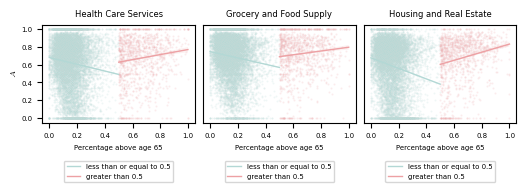

In [17]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#HGH

import matplotlib.pyplot as plt
import seaborn as sns  

ctype='_10 miles'

fig, ax=plt.subplots(1,3,constrained_layout=True, figsize=(372/72.27, 120/72.27))#



palette=plt.get_cmap('tab20c')

colors=['#B3D8D5', '#EDA1A4']
cmap=ListedColormap(colors)



for j,key in enumerate(['Health Care Services','Grocery and Food Supply','Housing and Real Estate']):
    df1=dfAll[dfAll['ParentType']==key]


    categories = df1['age'].unique()
    
    if j==0:
        hloc=(0.5,0.6)
    elif j==1:
        hloc=(0.6,0.7)
    else:
        hloc=(0.45,0.65)

    # For each category, create a regplot and scatterplot
    for i,category in enumerate(categories):
       
        
        # Subset the data to only this category
        df_subset = df1[df1['age'] == category]

        # Sample the subset if it's for scatter points
        df_sample = df_subset.sample(frac=0.05)
        #df_sample1 = df_subset.sample(frac=0.001)
        df_sample2 = df_subset.sample(frac=0.5)

        # Plot the regression line (from the full subset)
        
        
        print(category)
        
        if i==0:
            sn=sns.regplot(data=df_subset , x="percent_above_65", y='AccRatio'+ctype,scatter=False, ax=ax[j],
                           color=colors[0],label=category, line_kws={'linewidth': 1})
           
            
            # Plot the scatter points (from the sampled subset)
            sn=sns.scatterplot(data=df_sample, x="percent_above_65", y='AccRatio'+ctype, 
                        alpha=0.2,color=colors[0], ax=sn,legend=True,s=2)     
            sn.legend(loc='center', bbox_to_anchor=(0.5, -0.5),prop={'size': 5})
            
        else:
            sn=sns.regplot(data=df_subset , x="percent_above_65", y='AccRatio'+ctype,scatter=False, ax=sn,
                           color=colors[1],label=category, line_kws={'linewidth': 1})
           

            # Plot the scatter points (from the sampled subset)
            sn=sns.scatterplot(data=df_sample2, x="percent_above_65", y='AccRatio'+ctype, 
                        color=colors[1],alpha=0.2, ax=sn,legend=True,s=2)  
            sn.legend(loc='center', bbox_to_anchor=(0.5, -0.5),prop={'size': 5})
    

    

    
    sn.set_title(key,fontsize=6)
    if j>0:
        sn.set(ylabel=None)
        ax[j].set_yticklabels([])
        ax[j].yaxis.set_ticks([]) 
    else: 
        sn.set_ylabel(r'$A$', fontsize=5, usetex=True)      
        
    sn.tick_params(axis='both', which='both', bottom=True, left=True, labelsize=5) 
   
    
    sn.set_xlabel('Percentage above age 65', fontsize=5) 

plt.show()      

In [18]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format('correlation_A_age_10miles-372pt'),dpi=600
           ,bbox_inches='tight') #b

plot US FL AZ CA accratio distributions in two groups

In [615]:
dfT['age']=dfT.apply(lambda x: 'greater than 0.5' if x['percent_above_65']>0.5 else 'less than or equal to 0.5',
                             axis=1)
dfT['is_old']=dfT.apply(lambda x: 1 if x['percent_above_65']>0.5 else 0,
                             axis=1)



In [141]:
dfT

,census_block_group,population_by_age,percent_above_65,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,age,is_old
0,10010201001,745,0.036242,0.659574,0.893333,0.750000,AL,less than or equal to 0.5,0
1,10010201002,1265,0.114625,0.280000,0.662252,0.549488,AL,less than or equal to 0.5,0
2,10010202001,960,0.161458,0.655172,0.936508,0.742515,AL,less than or equal to 0.5,0
3,10010202002,1236,0.094660,0.666667,0.787234,0.769784,AL,less than or equal to 0.5,0
4,10010203001,2364,0.134095,0.320225,0.831461,0.479651,AL,less than or equal to 0.5,0
...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,0.226927,0.000000,1.000000,0.615385,PR,less than or equal to 0.5,0
220329,721537506012,2703,0.107658,0.181818,0.833333,0.257143,PR,less than or equal to 0.5,0
220330,721537506013,1195,0.057741,0.000000,1.000000,0.200000,PR,less than or equal to 0.5,0
220331,721537506021,2005,0.220449,2.000000,2.000000,0.277778,PR,less than or equal to 0.5,0


In [142]:
#read data

dfGroup=dfT
dfGroup['census_block_group']=dfGroup['census_block_group'].astype('int64')


#dfGroup=dfGroup[dfGroup['Health Care Services_accratio5m']<1.1]
#dfGroup=dfGroup[dfGroup['Grocery and Food Supply_accratio5m']<1.1]
#dfGroup=dfGroup[dfGroup['Housing and Real Estate_accratio5m']<1.1]

df_HCS=dfGroup[['census_block_group','Health Care Services_accratio5m','state','age']]
df_HCS=df_HCS.rename(columns={'Health Care Services_accratio5m':'accratio5m'})
df_HCS['type']='Health Care Services'
df_GFS=dfGroup[['census_block_group','Grocery and Food Supply_accratio5m','state','age']]
df_GFS=df_GFS.rename(columns={'Grocery and Food Supply_accratio5m':'accratio5m'})
df_GFS['type']='Grocery and Food Supply'
df_HRE=dfGroup[['census_block_group','Housing and Real Estate_accratio5m','state','age']]
df_HRE=df_HRE.rename(columns={'Housing and Real Estate_accratio5m':'accratio5m'})
df_HRE['type']='Housing and Real Estate'

dfG=pd.concat([df_HCS,df_GFS,df_HRE])

In [143]:
dfG[dfG['age']=='greater than 0.5']

,census_block_group,accratio5m,state,age,type
53,10030107014,0.629630,AL,greater than 0.5,Health Care Services
94,10030114012,0.511811,AL,greater than 0.5,Health Care Services
121,10030116021,0.122222,AL,greater than 0.5,Health Care Services
313,10159819011,1.000000,AL,greater than 0.5,Health Care Services
1232,10730016003,0.878788,AL,greater than 0.5,Health Care Services
...,...,...,...,...,...
219438,721130724003,0.500000,PR,greater than 0.5,Housing and Real Estate
219768,721270055004,2.000000,PR,greater than 0.5,Housing and Real Estate
219961,721270105001,0.836735,PR,greater than 0.5,Housing and Real Estate
220235,721455605001,0.600000,PR,greater than 0.5,Housing and Real Estate


In [144]:
import numpy as np
stateshowlist=['FL','AZ','CA']
alist=[]
for state in stateshowlist:
    for tp in dfG['type'].unique():
        for ag in dfG['age'].unique():
            alist.append([state,ag,tp,np.median(dfG[(dfG['age']==ag)&(dfG['type']==tp)&(dfG['state']==state)]['accratio5m'])])
dfGG=pd.DataFrame(alist,columns=['state','age','type','median_accratio5m'])      

小提琴图中的四分位数线数量为： 18
小提琴图中的四分位数线数量为： 18
小提琴图中的四分位数线数量为： 18
小提琴图中的四分位数线数量为： 18


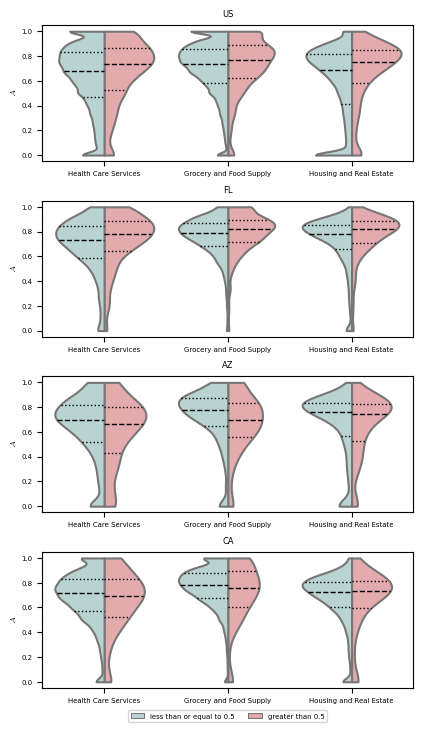

In [156]:
#plot
fig, ax=plt.subplots(4,1,constrained_layout=True, figsize=(0.8*372/72.27,0.8*651/72.27))#

colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

#colors=['#42BCB2', '#197AB7']
#cmap=ListedColormap(colors)

sn=sns.violinplot(x='type',y='accratio5m',hue='age',hue_order=['less than or equal to 0.5','greater than 0.5'],
                  data=dfG[dfG['accratio5m']<1.1],ax=ax[0],palette=colors,cut=0.0,inner="quartiles",split=True)

# 获取四分位数线
quartile_lines = [line for line in ax[0].lines if line.get_linestyle() == '--']

# 输出四分位数线的个数
print("小提琴图中的四分位数线数量为：", len(quartile_lines))
# 设置四分位数线的颜色、粗细和样式
for k,line in enumerate(quartile_lines):
    if k%3==1:
        line.set_color('black')  # 设置颜色为红色
        line.set_linewidth(1)  # 设置线条粗细为2
        line.set_linestyle('--')  # 设置线条样式为点状线
    else:
        line.set_color('black')  # 设置颜色为红色
        line.set_linewidth(1)  # 设置线条粗细为2
        line.set_linestyle(':')  # 设置线条样式为点状线



sn.set_title('US',fontsize=6)
sn.set_xlabel('')
sn.set_ylabel(r'$A$', fontsize=5, usetex=True)
ax[0].tick_params(axis='both', which='both', labelsize=5, bottom=True, left=True)  # 设置x y轴标签大小
sn.legend('',edgecolor='white')
#sn.legend(title='',fontsize='small',loc='upper right')
for i,state in enumerate(list(dfGG['state'].unique())):
    plotdata=dfG[(dfG['state']==state)& (dfG['accratio5m']<1.1)]
    sn=sns.violinplot(x='type',y='accratio5m',hue='age',hue_order=['less than or equal to 0.5','greater than 0.5'],
                      data=plotdata,ax=ax[i+1],palette=colors,cut=0.0,inner="quartiles",split=True)


    # 获取四分位数线
    quartile_lines = [line for line in ax[i+1].lines if line.get_linestyle() == '--']

    # 输出四分位数线的个数
    print("小提琴图中的四分位数线数量为：", len(quartile_lines))
    # 设置四分位数线的颜色、粗细和样式
    for k,line in enumerate(quartile_lines):
        if k%3==1:
            line.set_color('black')  # 设置颜色为红色
            line.set_linewidth(1)  # 设置线条粗细为2
            line.set_linestyle('--')  # 设置线条样式为点状线
        else:
            line.set_color('black')  # 设置颜色为红色
            line.set_linewidth(1)  # 设置线条粗细为2
            line.set_linestyle(':')  # 设置线条样式为点状线
    
    sn.set_title(state,fontsize=6)
    sn.set_xlabel('')
    sn.set_ylabel(r'$A$', fontsize=5, usetex=True)
    if i<2:
        sn.legend('',edgecolor='white')
        
    else:
        sn.legend(title='',ncol=2,loc=(0.23,-0.25),prop={'size': 5})
    ax[i+1].tick_params(axis='both', which='both', labelsize=5, bottom=True, left=True)  # 设置x y轴标签大小
#fig.tight_layout()

In [157]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/SI/{}.jpg'.format('3states_Med_A_grouped_10miles-0.8_372pt'),dpi=600
           ,bbox_inches='tight') #b

regression

In [168]:
#regression in US level 10-mile
import statsmodels.api as sm
import pandas as pd

dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL',
            '13': 'GA', '15': 'HI', '16': 'ID','17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', 
            '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO','30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', 
            '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA','44': 'RI', 
            '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', 
            '56': 'WY', '60': 'AS', '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}

def class_sig(pv):
    if pv<0.001:
        return '***'
    elif pv<0.01:
        return '**'
    elif pv<0.05:
        return '*'
    else:
        return 'not significant' 

listControl=['census_block_group','state','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']
df_contr=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv',
                     usecols=listControl)


homoRegResultCountry=[]
heteRegResultCountry=[]

NaRegListCountry=[]

col=['census_block_group','ParentType','num_accessible_facility','demand_ratios','demand_met_in_local','age']

listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']




for key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:#listParentType: 
    
    homoPath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/hete_supply_demand/'+key+'.csv'

    dfHomo=pd.read_csv(homoPath,usecols=col)

    
    dfHomo['dum_age']=dfHomo.apply(lambda x: 1 if x.age=='greater than 0.5' else 0,axis=1)

    
    dfHomo=pd.merge(dfHomo,df_contr,how='left',on='census_block_group')

    
    dfHomo['census_block_group']=dfHomo['census_block_group'].astype(str)

           
    dfHomo['state']=dfHomo.apply(lambda x: int(x['census_block_group'][0:2]) if len(x['census_block_group'])==12 else 
                                int(x['census_block_group'][0:1]), axis=1 )
    

    

    #homo
    df_reg=dfHomo[(dfHomo['demand_met_in_local']<=1)&(dfHomo['median_income_normalized by 250000']<=1.0005)&
                      (dfHomo['percent_undergraduate or higher']<=1)&(dfHomo['percent_minority']<=1)]
    num_obs=len(df_reg)
        
    num_old_obs=sum(df_reg['dum_age'])
    if (num_obs>0) &(num_old_obs>0):

        y=df_reg.loc[:,['demand_met_in_local']]

        
        #reg4 add state 
        reg4_X=['dum_age','demand_ratios',
                       'median_income_normalized by 250000','percent_undergraduate or higher','percent_minority','state']

                
        x4=df_reg.loc[:,reg4_X]
        x4=sm.add_constant(x4)
        model4=sm.OLS(y,x4).fit()   
        
        print(model4.summary())
        
        #reg without dum_age add state 

        reg0_X=['demand_ratios',
                       'median_income_normalized by 250000','percent_undergraduate or higher','percent_minority','state']

                
        x0=df_reg.loc[:,reg0_X]
        x0=sm.add_constant(x0)
        model0=sm.OLS(y,x0).fit() 
        
        print(key)
        #print(model0.summary())

                             OLS Regression Results                            
Dep. Variable:     demand_met_in_local   R-squared:                       0.086
Model:                             OLS   Adj. R-squared:                  0.086
Method:                  Least Squares   F-statistic:                     3333.
Date:                 Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                         13:40:50   Log-Likelihood:                -14283.
No. Observations:               212436   AIC:                         2.858e+04
Df Residuals:                   212429   BIC:                         2.865e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------